# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [75]:
# Take make moons in built dataset

data_ = datasets.make_moons(123)

In [76]:
# check the dataset

data_

(array([[ 1.93571682e+00,  1.47247913e-01],
        [ 1.67927334e+00, -2.33885366e-01],
        [ 2.15880193e-01, -1.20609482e-01],
        [ 1.05512918e-01,  5.29062070e-02],
        [ 1.99469988e+00,  3.97179003e-01],
        [-9.94521895e-01,  1.04528463e-01],
        [ 4.73646192e-02,  1.95885168e-01],
        [ 5.44639035e-01,  8.38670568e-01],
        [ 1.12839836e+00, -4.91722674e-01],
        [ 1.75113193e+00, -1.60152121e-01],
        [ 1.37672789e+00, -4.26323968e-01],
        [-7.07106781e-01,  7.07106781e-01],
        [ 3.09016994e-01,  9.51056516e-01],
        [-9.87688341e-01,  1.56434465e-01],
        [-9.78147601e-01,  2.07911691e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 7.70312258e-01, -4.73264374e-01],
        [ 1.87028524e+00,  7.45193205e-03],
        [ 2.48868069e-01, -1.60152121e-01],
        [ 8.66025404e-01,  5.00000000e-01],
        [ 6.23272106e-01, -4.26323968e-01],
        [ 6.42831810e-02,  1.47247913e-01],
        [ 6.69130606e-01,  7.431

In [77]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [78]:
inputData.head()

,0,1
0,1.935717,0.147248
1,1.679273,-0.233885
2,0.215880,-0.120609
3,0.105513,0.052906
4,1.994700,0.397179


In [79]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,1
1,1
2,1
3,1
4,1


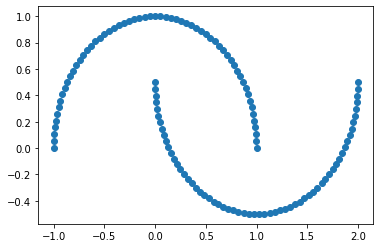

In [80]:
# create a scatter plot for inputData set

plt.scatter(inputData[0], inputData[1])

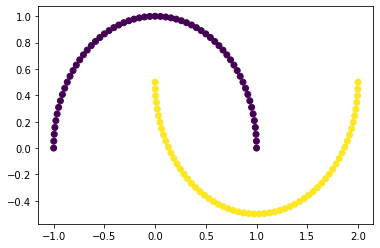

In [81]:
# create a scatter plot for inputData set with outputData color

plt.scatter(inputData[0], inputData[1], c=outputData)

In [97]:
# Call the sklearn Kmeans and make a model with 200 samples
from sklearn.cluster import KMeans as KM

model = KM(n_clusters=6)
model.fit(inputData)

#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
# check for labels

model.labels_

array([3, 3, 2, 2, 3, 4, 2, 5, 1, 3, 1, 4, 0, 4, 4, 1, 1, 3, 2, 5, 1, 2,
       5, 2, 1, 0, 2, 3, 3, 2, 1, 4, 0, 4, 1, 1, 3, 5, 3, 1, 5, 5, 0, 0,
       1, 1, 0, 3, 0, 1, 2, 4, 3, 1, 0, 5, 5, 5, 0, 2, 0, 5, 0, 5, 4, 2,
       4, 0, 1, 2, 3, 3, 4, 5, 2, 2, 4, 3, 5, 4, 4, 0, 2, 0, 4, 2, 3, 4,
       3, 5, 2, 1, 4, 4, 1, 1, 2, 2, 4, 5, 1, 5, 4, 0, 1, 5, 0, 3, 0, 0,
       5, 1, 5, 0, 1, 1, 4, 3, 2, 0, 0, 3, 0], dtype=int32)

In [99]:
# call metrics and check silhoutte score
from sklearn import metrics
metrics.silhouette_score(inputData, model.labels_)


0.4993783865065824

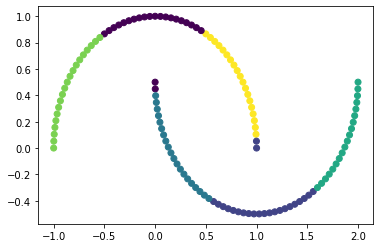

In [101]:
# create a scatter plot for inputData set with model labels color

plt.scatter(inputData[0], inputData[1], c=model.labels_)

finding right number of cluster

In [102]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

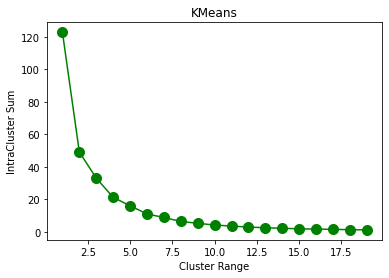

In [103]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()